# Technical Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def toGeo(x):
    #converts PETSys ID to geometric ID
    y = 8*indices.get(x)[0] + indices.get(x)[1]
    return y

indices = {
      0 : (4,7-7),
      1 : (4,7-6),
      2 : (7,7-5),
      3 : (5,7-7),
      4 : (5,7-4),
      5 : (5,7-5),
      6 : (4,7-4),
      7 : (7,7-7),
      8 : (6,7-6),
      9 : (7,7-4),
      10 : (5,7-6),
      11 : (6,7-4),
      12 : (4,7-5),
      13 : (6,7-5),
      14 : (6,7-7),
      15 : (7,7-6),
      16 : (3,7-7),
      17 : (3,7-6),
      18 : (2,7-7),
      19 : (2,7-6),
      20 : (0,7-7),
      21 : (1,7-7),
      22 : (0,7-6),
      23 : (1,7-6),
      24 : (3,7-5),
      25 : (1,7-5),
      26 : (2,7-5),
      27 : (4,7-3),
      28 : (0,7-5),
      29 : (3,7-4),
      30 : (0,7-4),
      31 : (1,7-4),
      32 : (2,7-4),
      33 : (3,7-3),
      34 : (2,7-3),
      35 : (0,7-3),
      36 : (1,7-3),
      37 : (0,7-2),
      38 : (5,7-3),
      39 : (1,7-2),
      40 : (2,7-2),
      41 : (3,7-2),
      42 : (1,7-1),
      43 : (0,7-1),
      44 : (0,7-0),
      45 : (3,7-1),
      46 : (1,7-0),
      47 : (2,7-1),
      48 : (3,7-0),
      49 : (2,7-0),
      50 : (6,7-2),
      51 : (6,7-1),
      52 : (7,7-1),
      53 : (4,7-1),
      54 : (5,7-1),
      55 : (6,7-0),
      56 : (7,7-0),
      57 : (7,7-2),
      58 : (7,7-3),
      59 : (4,7-2),
      60 : (5,7-0),
      61 : (5,7-2),
      62 : (6,7-3),
      63 : (4,7-0),
      64:(3+8,7),
      65:(3+8,6),
      66:(2+8,4),
      67:(2+8,6),
      68:(3+8,4),
      69:(1+8,7),
      70:(1+8,5),
      71:(0+8,7),
      72:(1+8,6),
      73:(3+8,3),
      74:(2+8,7),
      75:(2+8,3),
      76:(3+8,5),
      77:(0+8,5),
      78:(2+8,5),
      79:(0+8,6),
      80:(4+8,7),
      81:(6+8,7),
      82:(5+8,7),
      83:(7+8,7),
      84:(5+8,6),
      85:(4+8,6),
      86:(6+8,6),
      87:(7+8,6),
      88:(4+8,5),
      89:(6+8,5),
      90:(5+8,5),
      91:(1+8,4),
      92:(7+8,5),
      93:(7+8,4),
      94:(6+8,4),
      95:(4+8,4),
      96:(5+8,4),
      97:(5+8,3),
      98:(6+8,3),
      99:(4+8,3),
      100:(7+8,3),
      101:(7+8,2),
      102:(0+8,4),
      103:(6+8,2),
      104:(7+8,1),
      105:(5+8,2),
      106:(6+8,1),
      107:(4+8,2),
      108:(7+8,0),
      109:(5+8,1),
      110:(6+8,0),
      111:(4+8,1),
      112:(5+8,0),
      113:(4+8,0),
      114:(0+8,2),
      115:(2+8,1),
      116:(0+8,1),
      117:(3+8,1),
      118:(1+8,1),
      119:(1+8,0),
      120:(0+8,0),
      121:(1+8,2),
      122:(1+8,3),
      123:(3+8,2),
      124:(2+8,0),
      125:(2+8,2),
      126:(0+8,3),
      127:(3+8,0)}

geo_channels = []
for i in range(128):
    geo_channels.append([i,toGeo(i)])
geo_channels = np.asarray(geo_channels)

def toGeoChannelID(AbsChannelID):
    # Convert PETSys absolute channel IDs to geomteric IDs
    slaveID = AbsChannelID // 4096
    chipID = (AbsChannelID - slaveID*4096) // 64
    channelID = AbsChannelID % 64

    PCB_ChanID = 64*(chipID % 2) + channelID
    AbsPCB_ChanID = geo_channels[geo_channels[:,0] == PCB_ChanID][0][1]

    #General formula can be found in above function "to AbsChannelID"
    GeoChannelID = 10**4 * slaveID + 10**2 * chipID + AbsPCB_ChanID % 64
    return GeoChannelID

# all credit to Kyle Klein for toGeoChannelID function! 


# call this function to read in data in the manner we always do, this way we dont have to type this code every time
# for flag "convert_time_units" factor to convert to.. default is time is picoseconds so to get seconds set convert_time_units = 10e9
def getCoincidenceDataFrame(file,chunksize = None,convert_time_units = 1):
    df = pd.read_csv(file,sep='\t',usecols=[2,3,4,7,8,9],chunksize=chunksize)
    df.columns = ['TimeL', 'ChargeL', 'ChannelIDL', 'TimeR', 'ChargeR', 'ChannelIDR']
    df['TimeL'] = df['TimeL'] * convert_time_units
    df['TimeR'] = df['TimeR'] * convert_time_units
    
    return df

def getSinglesDataFrame(file,chunksize = None,convert_time_units = 1):
    df = pd.read_csv(file,sep='\t',chunksize=chunksize)
    df.columns = ['Time', 'Charge', 'ChannelID']
    df['Time'] = df['Time'] * convert_time_units
    
    return df


def convertDataFrameToGeoID(df):
    geoIDL = []
    geoIDR = []
    for IDL,IDR in zip(df['ChannelIDL'].to_numpy(),df['ChannelIDR'].to_numpy()):
        geoIDL.append(toGeoChannelID(IDL))
        geoIDR.append(toGeoChannelID(IDR))
    df['ChannelIDL'] = np.array(geoIDL).astype(int)
    df['ChannelIDR'] = np.array(geoIDR).astype(int)
    return 0



# Coincidence Data Analysis Functions

In [13]:
# for obtaining energy/timing resolutions
def gaussian(x,A,mu,sig):
    return A * np.exp(-((x-mu)/sig)**2)

def SingleChannelEnergyResponse(df,channelID,bins,sigma_cut=2.5):
    if channelID in np.unique(df.ChannelIDL):
        df = df[df.ChannelIDL == channelID]
        data = df.ChargeL
    else:
        df = df[df.ChannelIDR == channelID]
        data = df.ChargeR
    
    fig,ax = plt.subplots(figsize = (10,7))
    y,x,_ = plt.hist(data,bins = bins)
    bincenters = np.array([0.5 * (x[i] + x[i+1]) for i in range(len(x) - 1)])
    
    A = np.max(y)
    mu = x[np.where(y == A)[0][0]]
    guess = [A,mu,1]
    
    try:
        p,c = curve_fit(gaussian,bincenters,y,p0=guess)
        xspace = np.linspace(p[1]-2.5*p[2],p[1]+2.5*p[2])
        ax.plot(xspace,gaussian(xspace,*p),color = 'red',linestyle='dashed')
        FWHM = abs(2.355 * p[2])
        photopeakcut = p[1]-sigma_cut*p[2]
        eres = FWHM / p[1] * 100
    except:
        print('Fit-Failed')
        eres = None
        photopeakcut = None
    
    return eres,photopeakcut,p


def getChannelPairs(df,threshold):
    channelData = df.drop(['TimeL','ChargeL','TimeR','ChargeR'],axis=1)
    uniqueChannelPairs,Occurences = np.unique(channelData.to_numpy(),axis = 0,return_counts = True)
    mostActiveChannels = np.where(Occurences >= threshold)[0]
    uniqueChannelPairs = uniqueChannelPairs[mostActiveChannels]
    return uniqueChannelPairs


def getCoincidenceTimeDiffs(df,IDL,IDR,bins,photocut = False,photopeakcuts=[0,0]):
    df_coinc = df[df.ChannelIDL == IDL]
    df_coinc = df_coinc[df_coinc.ChannelIDR == IDR]
    
    # cut data such that it only encompasses data in the photopeak
    if photocut == True:
        df_coinc = df_coinc[df_coinc.ChargeL >= photopeakcuts[0]]
        df_coinc = df_coinc[df_coinc.ChargeR >= photopeakcuts[1]]
    
    timeDiffs = []
    for timeL,timeR in zip(df_coinc.TimeL,df_coinc.TimeR):
        timeDiffs.append(timeL - timeR)
    
    fig,ax = plt.subplots(figsize = (10,7))
    y,x,_ = plt.hist(timeDiffs,bins = bins)
    bincenters = np.array([0.5 * (x[i] + x[i+1]) for i in range(len(x) - 1)])
    
    A = np.max(y)
    mu = x[np.where(y == A)[0][0]]
    guess = [A,mu,np.std(timeDiffs)]
    
    try:
        p,c = curve_fit(gaussian,bincenters,y,p0=guess)
        xspace = np.linspace(p[1]-2.5*p[2],p[1]+2.5*p[2])
        ax.plot(xspace,gaussian(xspace,*p),color = 'red',linestyle='dashed')
        CTR = abs(2.355 * p[2])
    except:
        print('Fit-Failed')
        CTR = None
        
    return CTR,p
    

## Read-in data and convert to geometric channel ID
- getCoincidenceDataFrame() returns a pre-configured pandas dataframe
- convertDataFrameToGeoID() returns 0 but modifies said dataframe (df in our case) to use geometric channel IDs. 

In [3]:
df = getCoincidenceDataFrame('LYSO_15minute_Run1_coinc.dat')
convertDataFrameToGeoID(df)

0

## Plotting a single channel coincident energy spectrum
- fitted with a gaussian to get energy resolution
- SingleChannelEnergyResponse() purposefully leaves the figure open so we can edit plot aesthetics outside of the function, so after we call the function we set our own labels.

The Energy Resolution is 9.4% 

The threshold charge for a coincidence hit in the photopeak is 26.09 in DAQ Units 

The gaussian fit parameters are:
A = 667.68
µ (mean) = 28.35 charge in DAQ Units
σ (std) = 1.13 charge in DAQ Units


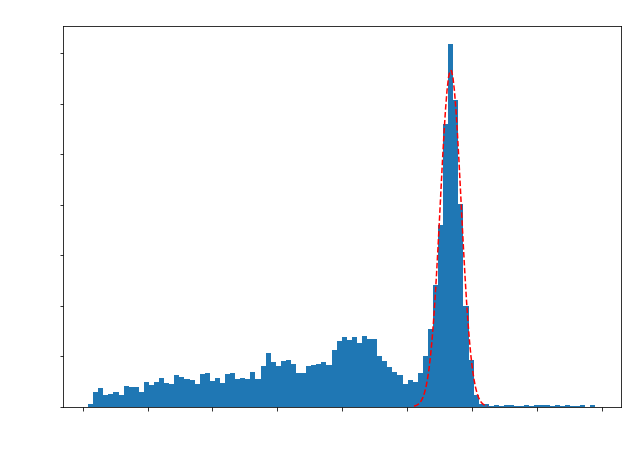

In [38]:
leftchannel = 1415
bins = 100
sigma_cut = 2

Eres,photopeakcut,fit_params = SingleChannelEnergyResponse(df,channel,bins,sigma_cut) #(dataframe,channelID,number of bins,sigma cut on photopeak)

# here we add labels 
plt.ylabel('Counts',fontsize = 18,color = 'white')
plt.xlabel('Charge in DAQ Units',fontsize = 18,color = 'white')
plt.title('Coincidence Energy Spectrum (Channel 1415)',fontsize = 18,color = 'white')
plt.xticks(fontsize = 14,color = 'white')
plt.yticks(fontsize = 14,color = 'white')

print('The Energy Resolution is ' + str(np.round(Eres,2)) + '% \n')
print('The threshold charge for a coincidence hit in the photopeak is ' + str(np.round(photopeakcut,2)) + ' in DAQ Units \n')
print('The gaussian fit parameters are:')
print('A = ' + str(np.round(fit_params[0],2)))
print('µ (mean) = ' + str(np.round(fit_params[1],2)) + ' charge in DAQ Units')
print('σ (std) = ' + str(np.round(fit_params[2],2)) + ' charge in DAQ Units')


## Plotting Coincidence Time Distribution for a given Channel pair
- fitted with a gaussian to get coincidence time resolution (CTR)
- getCoincidenceTimeDiffs() purposefully leaves the figure open so we can edit plot aesthetics outside of the function, so after we call the function we set our own labels. 
- Below we look at the timing differnces from the lines-of-response (coincidence hits) betwwen the left and right channel IDs 1415 and 154, respectively.

The Coincidence Time Resolution is 816.71 ps 

The gaussian fit parameters are:
A = 239.84
µ (mean) = 542.21 ps
σ (std) = 346.8 ps


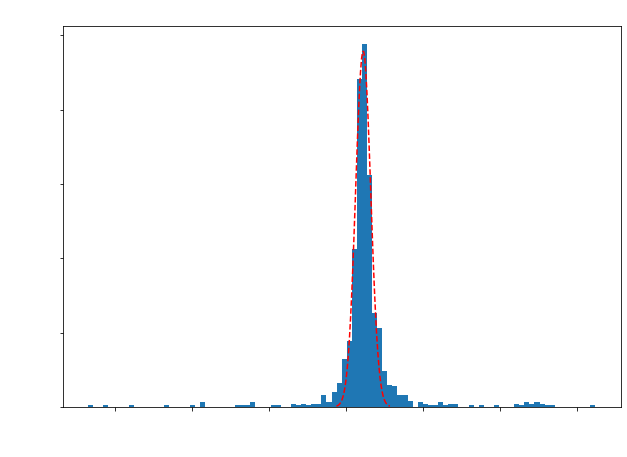

In [39]:
leftchannel = 1415
rightchannel = 154
bins = 100

CTR,fit_params = getCoincidenceTimeDiffs(df,leftchannel,rightchannel,bins)

# here we add labels 
plt.ylabel('Counts',fontsize = 18,color = 'white')
plt.xlabel('Time Differences [ps]',fontsize = 18,color = 'white')
plt.title('Time Difference Distribution (Channels 1415 & 154)',fontsize = 18,color = 'white')
plt.xticks(fontsize = 14,color = 'white')
plt.yticks(fontsize = 14,color = 'white')

print('The Coincidence Time Resolution is ' + str(np.round(CTR,2)) + ' ps \n')
print('The gaussian fit parameters are:')
print('A = ' + str(np.round(fit_params[0],2)))
print('µ (mean) = ' + str(np.round(fit_params[1],2)) + ' ps')
print('σ (std) = ' + str(np.round(fit_params[2],2)) + ' ps')

## Plotting Coincidence Time Distribution with photopeak cuts
- here we use SingleChannelEnergyResponse() and getCoincidenceTimeDiffs() together. We call SingleChannelEnergyResponse() twice, once for the left and right channels respectively. 
- In getCoincidenceTimeDiffs(), we can set photocut to be True and use the return values of SingleChannelEnergyResponse() to cut the left and right channel data to only include detctions that fall 2$\sigma$ within their respective photopeaks. 
- This can refine timing distributions to be narrower since this requires the timing differences to come from photoelectric effect events. Notice in the example below, we shave over 400 ps from our CTR! 

The Coincidence Time Resolution is 382.45 ps


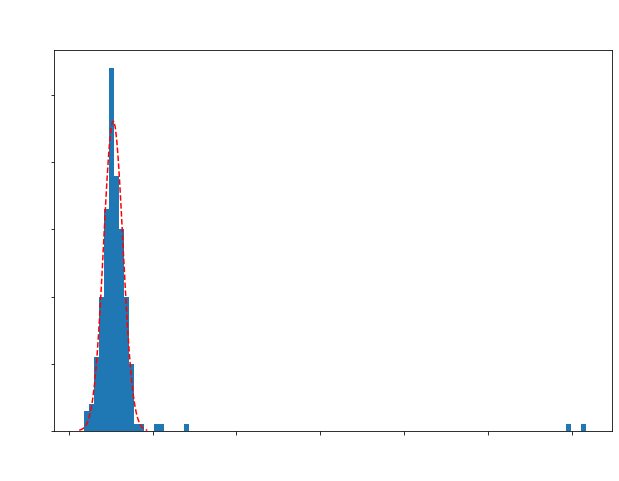

In [40]:
Eres_left,photopeakcut_left,fitParams_left = SingleChannelEnergyResponse(df,leftchannel,bins,sigma_cut)
plt.close() # we visalized this above, so let's close the figure to save memory
Eres_right,photopeakcut_right,fitParams_right = SingleChannelEnergyResponse(df,rightchannel,bins,sigma_cut)
plt.close()

# create our list of left and right channel photopeak cuts, should go [left_cut,right_cut]
photopeakcutList = [photopeakcut_left,photopeakcut_right] 

# plot the cut timing distribution!
CTR_with_photopeakcuts,CTR_fitParams = getCoincidenceTimeDiffs(df,leftchannel,rightchannel,100,photocut=True,photopeakcuts = photopeakcutList)
plt.ylabel('Counts',fontsize = 18,color = 'white')
plt.xlabel('Time Differences [ps]',fontsize = 18,color = 'white')
plt.title('Time Difference Distribution (Channels 1415 & 154)\n' + 'with a 2$\sigma$ photopeak cut',fontsize = 18,color = 'white')
plt.xticks(fontsize = 14,color = 'white')
plt.yticks(fontsize = 14,color = 'white')

print('The Coincidence Time Resolution is ' + str(np.round(CTR_with_photopeakcuts,2)) + ' ps')
